In [1]:
import pickle as pkl
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, r2_score
from datetime import timedelta
import time
import csv
from sklearnex import patch_sklearn
patch_sklearn()

X_train = pkl.load(open('CleanDataset/X_train.pkl', 'rb'))
y_train = pkl.load(open('CleanDataset/y_train.pkl', 'rb'))

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 5, shuffle=True, random_state=1)
    acc = make_scorer(accuracy_score)
    prc = make_scorer(precision_score)
    rec = make_scorer(recall_score)
    auc = make_scorer(roc_auc_score)
    f1 = make_scorer(f1_score)
    r2 = make_scorer(r2_score)

    acc_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=acc)
    prc_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=prc)
    rec_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=rec)
    auc_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=auc)
    f1_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring =f1)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [acc_val_score.mean(), prc_val_score.mean(), rec_val_score.mean(), auc_val_score.mean(),\
             f1_val_score.mean(), r2_val_score.mean()]
    return score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
def insert_csv(model_name, result, duration):
    msg = [{'Model':f'{model_name}','Training time': f"{duration}",'Accuracy': f"{round(result[0],4)*100}", \
    'Precision': f'{round(result[1],4)*100}', 'Recall': f'{round(result[2],4)*100}', 'AUC': f'{round(result[3],4)*100}',\
    'F1': f'{round(result[4],4)*100}', 'R2': f'{round(result[5],3)}'}]

    with open('record_result.csv', 'a', newline='\n') as csvfile:
        fieldnames = ['Model', 'Training time', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1', 'R2']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerows(msg)

In [6]:
X_train

array([[ 0.89820178, -0.95407482,  1.68026382, ..., -1.55505799,
         1.30543195,  0.16613223],
       [ 0.89820178,  0.51860417,  1.68026382, ..., -1.55505799,
         1.30543195,  0.16613223],
       [ 0.89820178, -0.67356454, -0.59514463, ..., -1.55505799,
        -1.34267342,  0.16613223],
       ...,
       [-1.11333558,  0.37834903, -0.59514463, ...,  0.64306283,
         1.30543195,  0.16613223],
       [-1.11333558, -0.18267154, -0.59514463, ...,  0.64306283,
         0.42273016,  0.16613223],
       [ 0.89820178,  0.79911446, -0.59514463, ...,  0.64306283,
        -0.45997163,  0.16613223]])

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression as LogReg
LR = LogReg()
start = time.perf_counter()
ResultLogReg = test_model(LR)
print(ResultLogReg)
duration = timedelta(seconds=time.perf_counter()-start)

insert_csv('Logistic Regression', ResultLogReg, duration)

[0.785310166911491, 0.7079471094544778, 0.9713226076254505, 0.7853085178538887, 0.8189806463566887, 0.14123209333058487]


## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
start = time.perf_counter()
ResultRF = test_model(clf)
print(ResultRF)
duration = timedelta(seconds=time.perf_counter()-start)

insert_csv('Random Forest', ResultRF, duration)

[0.8138169581819612, 0.7589651058281066, 0.9194204457666408, 0.8137347087817333, 0.8315932080242165, 0.25498742656910534]


## XGBoost

In [10]:
import xgboost
xgb = xgboost.XGBClassifier()
start = time.perf_counter()
ResultXGB = test_model(xgb)
print(ResultXGB)
duration = timedelta(seconds=time.perf_counter()-start)

insert_csv('XGBoost', ResultXGB, duration)

/home/wicom/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


[0.806792628694731, 0.7477046281147857, 0.9260596729667171, 0.8067912501860949, 0.8273778065916881, 0.2271628025363727]


## Support Vector Machine (SVM)

In [11]:
from sklearn.svm import SVC
svc = SVC()
start = time.perf_counter()
ResultSVM = test_model(svc)
print(ResultSVM)
duration = timedelta(seconds=time.perf_counter()-start)

insert_csv('SVM', ResultSVM, duration)

[0.7970128297157972, 0.7336723253787508, 0.9325439744342752, 0.7970117359820994, 0.8212388042982616, 0.1880432308521462]


## Sklearn MLP

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=None, max_iter=75, activation='logistic', learning_rate='adaptive', early_stopping=True)
start = time.perf_counter()
ResultMLP = test_model(mlp)
print(ResultMLP)
duration = timedelta(seconds=time.perf_counter()-start)

insert_csv('MLP', ResultMLP, duration)

[0.7976031663727945, 0.7349271509886465, 0.928957378763792, 0.7973307467496629, 0.8205574868430914, 0.18962657400296262]


### Conclusion

XGBoost memiliki performa dengan rata-rata yang terbaik. Oleh karena itu, kita akan menggunakan XGBoost untuk predict data.

In [31]:
X_test = pkl.load(open('CleanDataset/X_test.pkl', 'rb'))
y_test = pkl.load(open('CleanDataset/y_test.pkl', 'rb'))
y_test = y_test.values

In [32]:
X_test

array([[-1.11333558, -1.16445754,  1.68026382, ..., -1.55505799,
         1.30543195,  0.16613223],
       [-1.11333558, -0.11254397,  1.68026382, ..., -1.55505799,
         0.42273016,  0.16613223],
       [ 0.89820178,  0.51860417, -0.59514463, ...,  0.64306283,
         0.42273016,  0.16613223],
       ...,
       [ 0.89820178,  0.72898689, -0.59514463, ...,  0.64306283,
        -0.45997163,  0.16613223],
       [-1.11333558, -1.16445754,  1.68026382, ..., -1.55505799,
         0.42273016,  0.16613223],
       [-1.11333558, -1.16445754, -0.59514463, ...,  0.64306283,
         0.42273016,  0.16613223]])

In [33]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
Result_train = xgb.predict(X_train)
Result_test = xgb.predict(X_test)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

accuracy: 0.8090857285200971
precision: 0.7500641873331474
recall: 0.9270985111908084


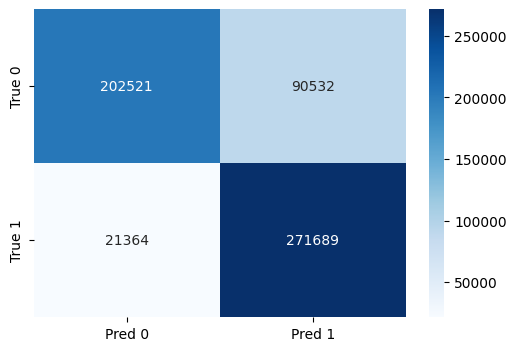

In [51]:
print("accuracy: " + str(accuracy_score(y_true=y_train, y_pred=Result_train)))
print("precision: " + str(precision_score(y_true=y_train, y_pred=Result_train)))
print("recall: " + str(recall_score(y_true=y_train, y_pred=Result_train)))

cm = confusion_matrix(y_true=y_train, y_pred=Result_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.show()

accuracy: 0.7153105531432886
precision: 0.28511634506242906
recall: 0.893508225878168


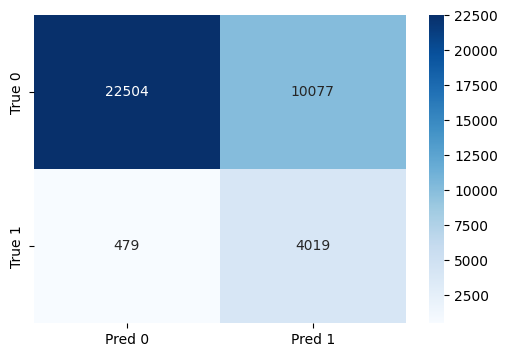

In [53]:
print("accuracy: " + str(accuracy_score(y_true=y_test, y_pred=Result_test)))
print("precision: " + str(precision_score(y_true=y_test, y_pred=Result_test)))
print("recall: " + str(recall_score(y_true=y_test, y_pred=Result_test)))

cm = confusion_matrix(y_true=y_test, y_pred=Result_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.show()

## Conclusion

### 1. Accuracy yang masih tinggi
**Accuracy** tetap cukup baik pada data testing, yang berarti model masih mampu memprediksi banyak contoh dengan benar. Namun **Accuracy** pada kasus ini tidak bisa menjadi metric utama karena seringkali menyesatkan jika dataset tidak seimbang (walaupun sudah kita SMOTE).

### 2. Recall yang tetap tinggi
**Recall** mengukur seberapa baik model menemukan semua data positif yang benar (***True Positives***). Ketika **Recall** tetap bagus, berarti model berhasil menemukan sebagian besar contoh positif dan model cenderung lebih befokus pada tidak melewatkan contoh positif (*Rendah False Negative*).

### 3. Precision yang turun drastis
Turunnya **Precesion** berarti model menghasilkan banyak ***false positive*** (contoh yang diprediksi sebagai positif tetapi sebenarnya negatif). Sehingga, prediksi positif dari model tidak bisa terlalu dipercaya karena sebagian besar dari prediksi itu salah.

### Penyebab
1. Kemungkinan besar karena overfitting pada data training.
2. Perubahan distribusi data karena efek SMOTE. SMOTE yang digunakan untuk mengatasi imbalance data dengan membuat data synthetic dari data training, menghasilkan distribusi kelas atau fitur dalam data testing (real tanpa data synthetic) berbeda signifikan dari data training, model kemungkinan kesulitan menyesuaikan diri.